In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
from textblob import TextBlob
import re

%matplotlib inline

In [2]:
import snscrape.modules.twitter as sntwitter

In [3]:
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('sparklenigeria since:2019-01-01 ').get_items()):
    if i > 5000:
        break
    else:    
        try:
            tweets_list.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
        except Exception as e:
            print(f"Error occured: {e}") # use try except to handle future warning errors



In [4]:
            
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

# Display first 5 entries from dataframe
tweets_df.tail(5)

,Datetime,Tweet Id,Text,Username
182,2020-07-25 14:43:46+00:00,1287035822835990529,Join us in a few minutes as we discuss ways to...,MonospaceNg
183,2020-07-21 13:28:57+00:00,1285567443579142149,#ClientInterview @Uzoma_Sparkle speaking on th...,Wimbart
184,2020-07-07 09:01:42+00:00,1280426754390339584,What he said!!! Digital is the way to social a...,Wimbart
185,2020-07-03 13:11:44+00:00,1279040127214522368,Light the way for Sparkle. #sparklenigeria #ne...,MaciekHM
186,2019-12-20 06:17:32+00:00,1207907867644198912,Sparkle Expands Reach in Africa with a New Poi...,telecomguru2017


In [5]:
tweets_df.head(20)

,Datetime,Tweet Id,Text,Username
0,2023-02-18 19:57:08+00:00,1627034501191806977,@Sparklenigeria hi,IdrisMu96431755
1,2023-02-17 14:17:14+00:00,1626586573071609857,Let’s see your 2 must-have cards this Month ❇️...,sparkle_nigeria
2,2023-02-16 12:00:55+00:00,1626189880303681538,@Sparklenigeria What is the i couldn't verify ...,Quazeemolaoluwa
3,2023-02-15 13:07:19+00:00,1625844203165999105,"Choose Freedom, Simplicity, Transparency, Trus...",sparkle_nigeria
4,2023-02-14 10:14:59+00:00,1625438446784495616,No plans for Valentine's yet? We've got you! 😉...,sparkle_nigeria
5,2023-02-13 09:59:43+00:00,1625072216311312386,Small businesses are the backbone of our econo...,sparkle_nigeria
6,2023-02-08 06:25:26+00:00,1623206350430908417,I have been unable to open my @sparklenigeria ...,Dollaesneh
7,2023-02-01 14:31:02+00:00,1620791842563555328,Happy New Month Sparklers ✨ \n\nWelcome to th...,sparkle_nigeria
8,2023-02-01 09:25:43+00:00,1620715004340350976,"@bod_republic @Sparklenigeria eyowo, paga kuda...",don_harlincho
9,2023-01-24 22:42:35+00:00,1618016441965613058,"@Sparklenigeria Sparkle, please return the mon...",MoreWills


In [6]:
# Export dataframe into a CSV
tweets_df.to_csv('sparkleTweets.csv', sep=',', index=False)

In [7]:
tf = pd.read_csv('sparkleTweets.csv')

In [8]:
tf.tail(5)

,Datetime,Tweet Id,Text,Username
182,2020-07-25 14:43:46+00:00,1287035822835990529,Join us in a few minutes as we discuss ways to...,MonospaceNg
183,2020-07-21 13:28:57+00:00,1285567443579142149,#ClientInterview @Uzoma_Sparkle speaking on th...,Wimbart
184,2020-07-07 09:01:42+00:00,1280426754390339584,What he said!!! Digital is the way to social a...,Wimbart
185,2020-07-03 13:11:44+00:00,1279040127214522368,Light the way for Sparkle. #sparklenigeria #ne...,MaciekHM
186,2019-12-20 06:17:32+00:00,1207907867644198912,Sparkle Expands Reach in Africa with a New Poi...,telecomguru2017


In [9]:
#function to remove the Twitter handles from the tweets
def remove_handles(tweet):
  return re.sub(r'@\S+', '', tweet)

In [10]:
# to remove the twitter handles from the new colunm and leave this column with the tweet text
tf['tweet_text'] = tf.Text.apply(remove_handles)

In [11]:
tf.head(5)

,Datetime,Tweet Id,Text,Username,tweet_text
0,2023-02-18 19:57:08+00:00,1627034501191806977,@Sparklenigeria hi,IdrisMu96431755,hi
1,2023-02-17 14:17:14+00:00,1626586573071609857,Let’s see your 2 must-have cards this Month ❇️...,sparkle_nigeria,Let’s see your 2 must-have cards this Month ❇️...
2,2023-02-16 12:00:55+00:00,1626189880303681538,@Sparklenigeria What is the i couldn't verify ...,Quazeemolaoluwa,What is the i couldn't verify my email?
3,2023-02-15 13:07:19+00:00,1625844203165999105,"Choose Freedom, Simplicity, Transparency, Trus...",sparkle_nigeria,"Choose Freedom, Simplicity, Transparency, Trus..."
4,2023-02-14 10:14:59+00:00,1625438446784495616,No plans for Valentine's yet? We've got you! 😉...,sparkle_nigeria,No plans for Valentine's yet? We've got you! 😉...


In [12]:
tf['tweet_text'].head(10)

0                                                   hi
1    Let’s see your 2 must-have cards this Month ❇️...
2              What is the i couldn't verify my email?
3    Choose Freedom, Simplicity, Transparency, Trus...
4    No plans for Valentine's yet? We've got you! 😉...
5    Small businesses are the backbone of our econo...
6    I have been unable to open my  app since last ...
7    Happy New Month Sparklers ✨  \n\nWelcome to th...
8                eyowo, paga kuda, access bank and gtb
9     Sparkle, please return the money you took fro...
Name: tweet_text, dtype: object

In [13]:
# remove all occurrences of '\n' from the 'tweet_text' column
tf['tweet_text'] = tf['tweet_text'].str.replace('\n', '')

# print the cleaned tweet_text column
tf['tweet_text'].head(10)


0                                                   hi
1    Let’s see your 2 must-have cards this Month ❇️...
2              What is the i couldn't verify my email?
3    Choose Freedom, Simplicity, Transparency, Trus...
4    No plans for Valentine's yet? We've got you! 😉...
5    Small businesses are the backbone of our econo...
6    I have been unable to open my  app since last ...
7    Happy New Month Sparklers ✨  Welcome to the Mo...
8                eyowo, paga kuda, access bank and gtb
9     Sparkle, please return the money you took fro...
Name: tweet_text, dtype: object

In [14]:
# create a get_sentiment() function
# accepts a DataFrame and a column as parameters

def get_sentiment(dataframe, column):
  text_column = dataframe[column]
  
  #apply TextBlob constructor to each value of text_column 
  textblob_sentiment = text_column.apply(TextBlob)

  # extracts and creates a new DataFrame for Polarity and Objectivity columns
  sentiment_values = [ {'Polarity': v.sentiment.polarity,'Subjectivity': v.sentiment.subjectivity}
                      for v in textblob_sentiment.values]
  return pd.DataFrame(sentiment_values)

In [15]:
# test the get_sentiment function
sentiment_frame = get_sentiment(tf, 'tweet_text')

In [16]:
sentiment_frame.head(6)

# Polarity is the output that lies between [-1,1], 
# where -1 refers to negative sentiment and +1 refers to positive sentiment.
# Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

,Polarity,Subjectivity
0,0.0000,0.000000
1,0.8000,0.400000
2,0.0000,0.000000
3,0.0000,0.000000
4,0.5000,0.700000
5,0.0875,0.416667


In [18]:
# join the original tweet DataFrame to the sentiment_frame DataFrame

tweets = pd.concat([tf, sentiment_frame], axis=1)


In [19]:
positive_tweets = tweets[tweets.Polarity > 0]
negative_tweets = tweets[tweets.Polarity <= 0]

In [20]:
negative_tweets

,Datetime,Tweet Id,Text,Username,tweet_text,Polarity,Subjectivity
0,2023-02-18 19:57:08+00:00,1627034501191806977,@Sparklenigeria hi,IdrisMu96431755,hi,0.000000,0.000000
2,2023-02-16 12:00:55+00:00,1626189880303681538,@Sparklenigeria What is the i couldn't verify ...,Quazeemolaoluwa,What is the i couldn't verify my email?,0.000000,0.000000
3,2023-02-15 13:07:19+00:00,1625844203165999105,"Choose Freedom, Simplicity, Transparency, Trus...",sparkle_nigeria,"Choose Freedom, Simplicity, Transparency, Trus...",0.000000,0.000000
6,2023-02-08 06:25:26+00:00,1623206350430908417,I have been unable to open my @sparklenigeria ...,Dollaesneh,I have been unable to open my app since last ...,-0.166667,0.355556
8,2023-02-01 09:25:43+00:00,1620715004340350976,"@bod_republic @Sparklenigeria eyowo, paga kuda...",don_harlincho,"eyowo, paga kuda, access bank and gtb",0.000000,0.000000
...,...,...,...,...,...,...,...
174,2021-02-05 15:29:10+00:00,1357712879559016449,@EricaNlewedim @PreshDion @swvknigeria 🔥🔥🔥🔥🔥♥️...,real_petronella,🔥🔥🔥🔥🔥♥️♥️♥️♥️⭐⭐⭐⭐ #SparkleNigeria #Swarovsk...,0.000000,0.000000
176,2021-02-05 15:18:25+00:00,1357710177034723335,@swvknigeria #SparkleNigeria #SwarovskiIkejaMa...,EricaNlewedim,#SparkleNigeria #SwarovskiIkejaMall #Swarovsk...,0.000000,0.000000
177,2021-01-25 10:48:33+00:00,1353655994908372992,@Sparklenigeria in strategic partnership with ...,TecheconomyNG,in strategic partnership with payment experts...,0.000000,0.142857
179,2020-11-09 21:10:36+00:00,1325908672619433987,#SPARKLENIGERIA\nYOU SEE THIS BANK #SPARKLENIG...,Gokman78432700,#SPARKLENIGERIAYOU SEE THIS BANK #SPARKLENIGER...,0.000000,0.000000


In [21]:
positive_tweets

,Datetime,Tweet Id,Text,Username,tweet_text,Polarity,Subjectivity
1,2023-02-17 14:17:14+00:00,1626586573071609857,Let’s see your 2 must-have cards this Month ❇️...,sparkle_nigeria,Let’s see your 2 must-have cards this Month ❇️...,0.800000,0.400000
4,2023-02-14 10:14:59+00:00,1625438446784495616,No plans for Valentine's yet? We've got you! 😉...,sparkle_nigeria,No plans for Valentine's yet? We've got you! 😉...,0.500000,0.700000
5,2023-02-13 09:59:43+00:00,1625072216311312386,Small businesses are the backbone of our econo...,sparkle_nigeria,Small businesses are the backbone of our econo...,0.087500,0.416667
7,2023-02-01 14:31:02+00:00,1620791842563555328,Happy New Month Sparklers ✨ \n\nWelcome to th...,sparkle_nigeria,Happy New Month Sparklers ✨ Welcome to the Mo...,0.559091,0.738636
11,2023-01-20 13:18:18+00:00,1616424884636352516,We asked Sparklers about their New Year’s Reso...,sparkle_nigeria,We asked Sparklers about their New Year’s Reso...,0.136364,0.454545
...,...,...,...,...,...,...,...
182,2020-07-25 14:43:46+00:00,1287035822835990529,Join us in a few minutes as we discuss ways to...,MonospaceNg,Join us in a few minutes as we discuss ways to...,0.100000,0.200000
183,2020-07-21 13:28:57+00:00,1285567443579142149,#ClientInterview @Uzoma_Sparkle speaking on th...,Wimbart,#ClientInterview speaking on the launch of th...,0.162121,0.376515
184,2020-07-07 09:01:42+00:00,1280426754390339584,What he said!!! Digital is the way to social a...,Wimbart,What he said!!! Digital is the way to social a...,0.008333,0.016667
185,2020-07-03 13:11:44+00:00,1279040127214522368,Light the way for Sparkle. #sparklenigeria #ne...,MaciekHM,Light the way for Sparkle. #sparklenigeria #ne...,0.400000,0.700000


In [22]:
def tweetsPolarity(x):
    if x > 0:
        return 'Positive'
    elif x <= 0:
        return 'Negative'

In [23]:
tweets['Results'] = tweets['Polarity'].apply(tweetsPolarity)

Negative    103
Positive     84
Name: Results, dtype: int64


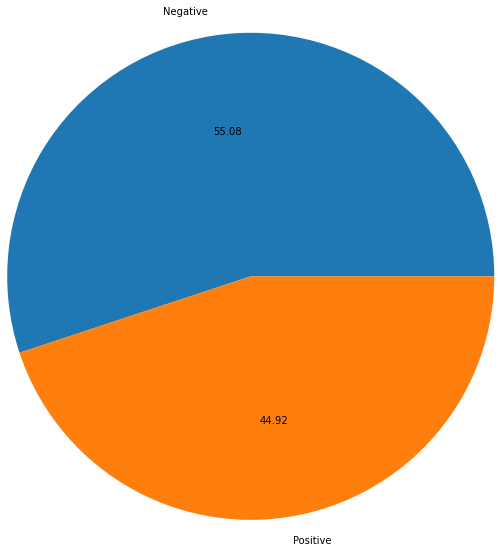

In [24]:
# draw a graph to display 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

values= tweets['Results'].value_counts() #counting unique value frequency
labels= tweets['Results'].unique().tolist() #creating the unique value labels

plt.pie(values, labels=labels, radius=2.8, autopct='%.2f')
print(values)